<a href="https://colab.research.google.com/github/anjalii-s/Thesis-2026-/blob/main/synthetic_dataset_7_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 20.0 MB/s eta 0:00:00

LOADING AND PREPROCESSING SYNTHETIC CREDIT RISK DATASET
Using Colab cache for faster access to the 'synthetic-credit-risk-dataset-extreme-imbalance' dataset.
Dataset loaded successfully!
Dataset shape: (15000, 13)

Columns: ['age', 'monthly_income', 'debt_ratio', 'credit_utilization', 'transaction_count_30d', 'avg_transaction_amount', 'employment_type', 'education_level', 'region', 'device_type', 'last_payment_delay_days', 'internal_score

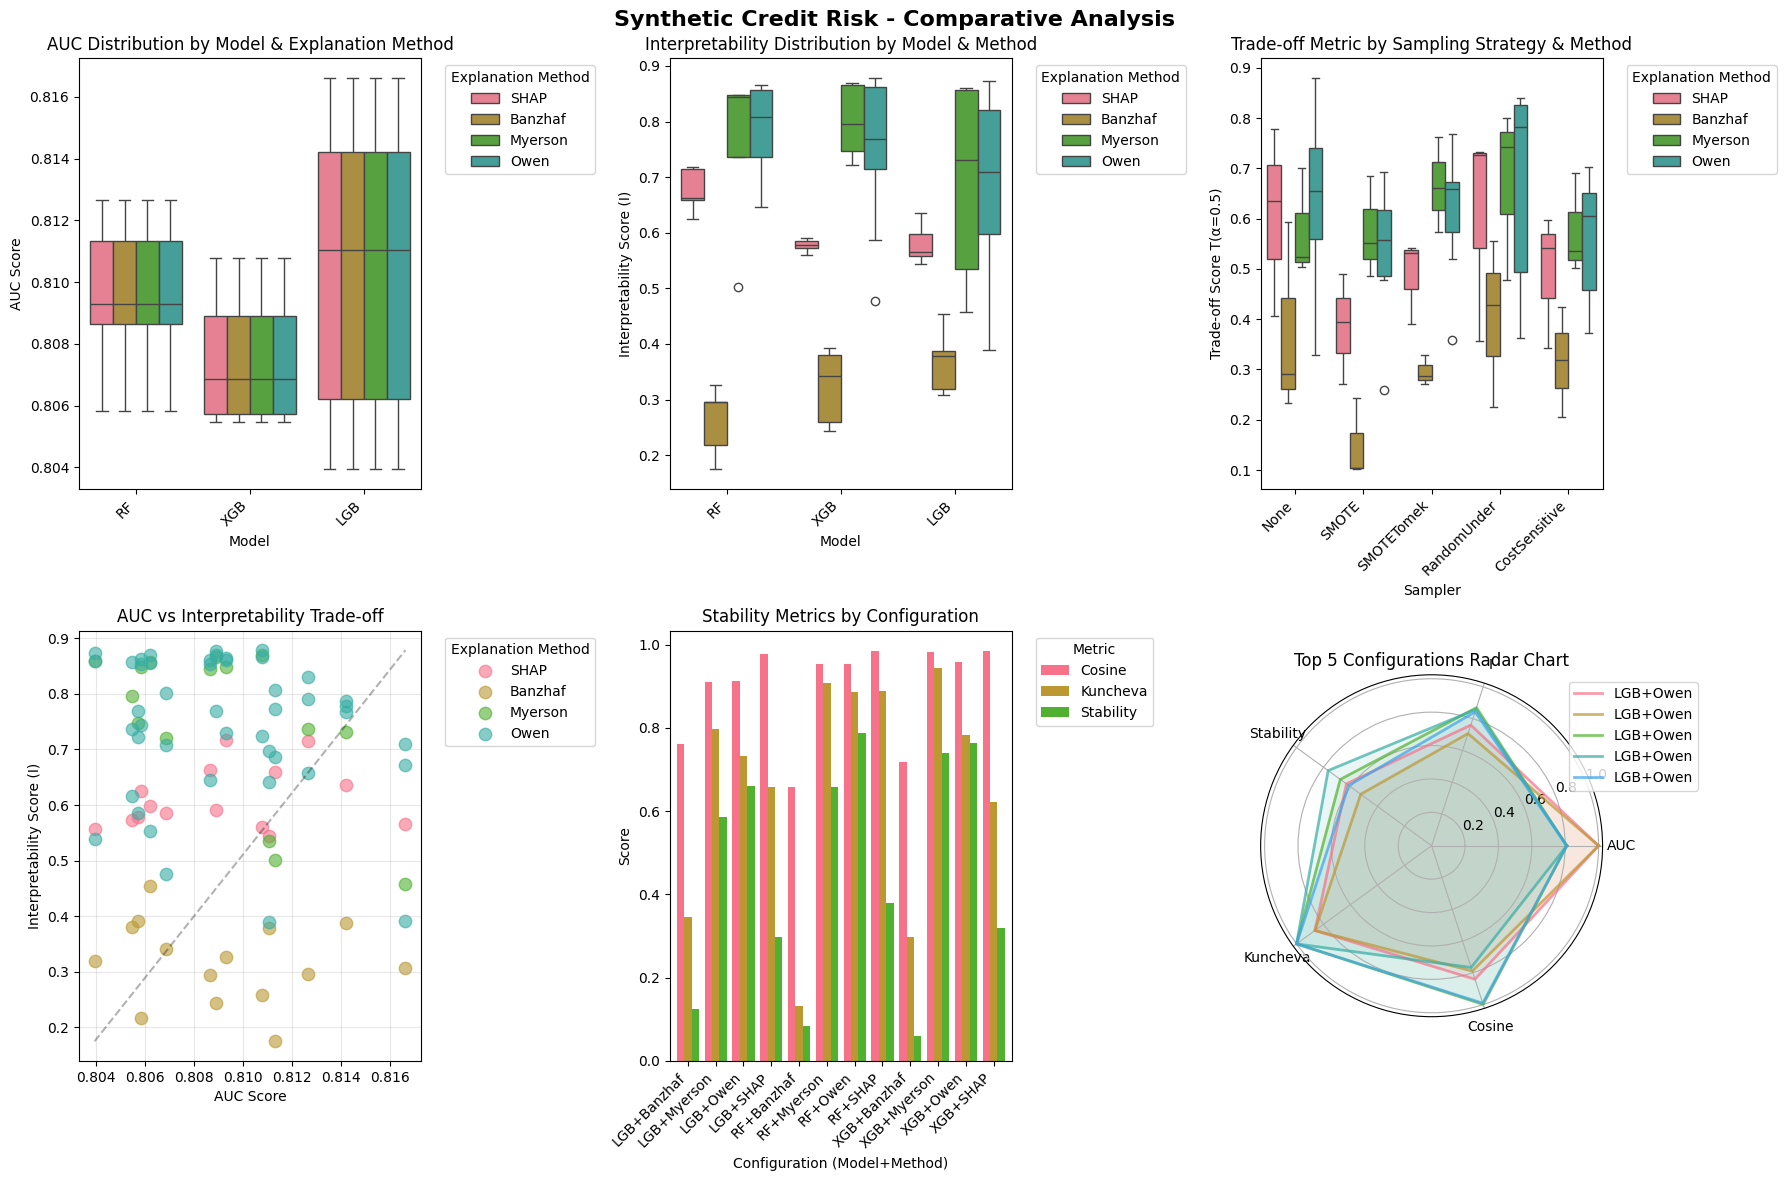

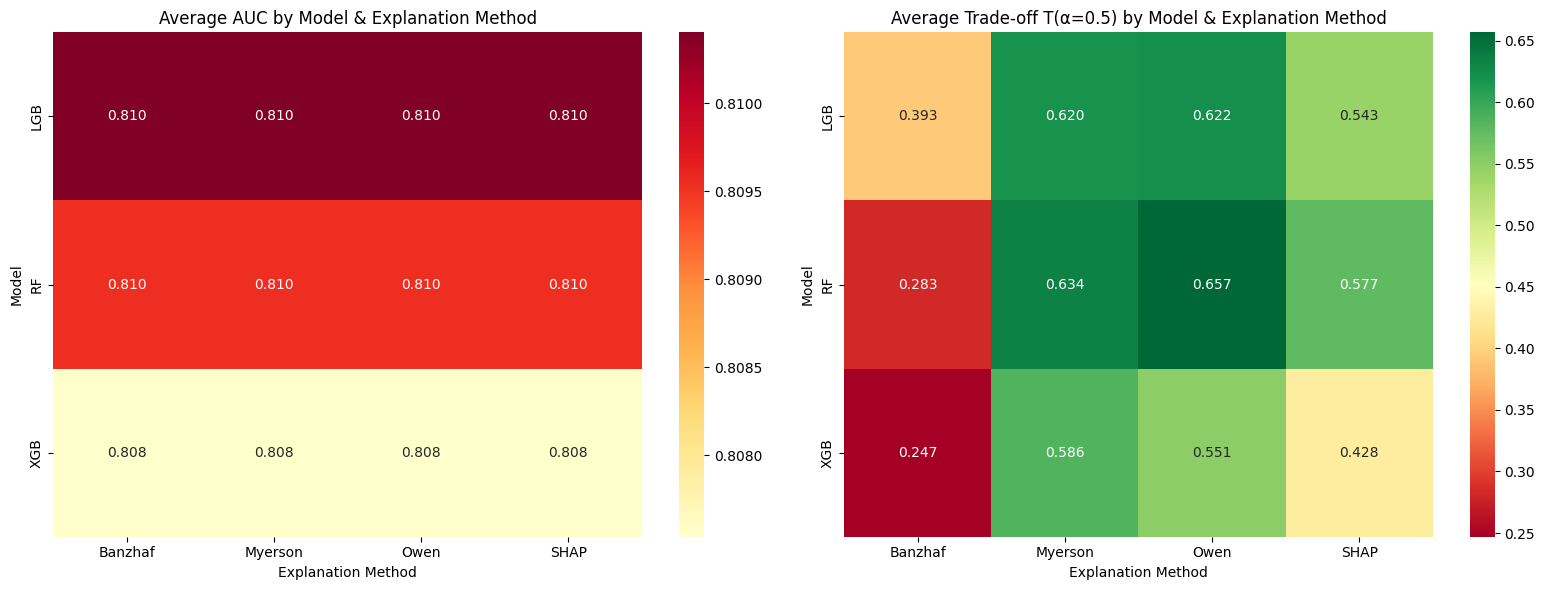


SYNTHETIC CREDIT RISK - STATISTICAL VALIDATION & VISUALIZATION COMPLETE!

OWEN GROUPS – DEDICATED VISUALIZATIONS


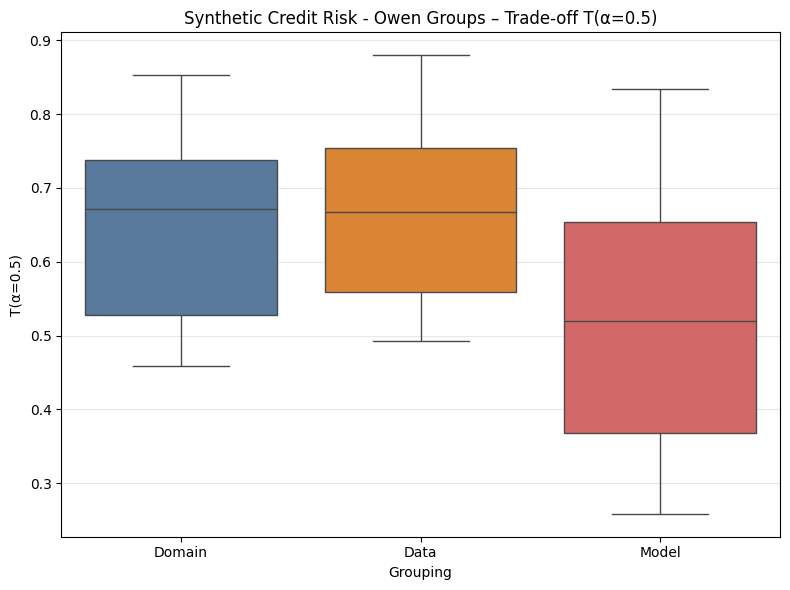

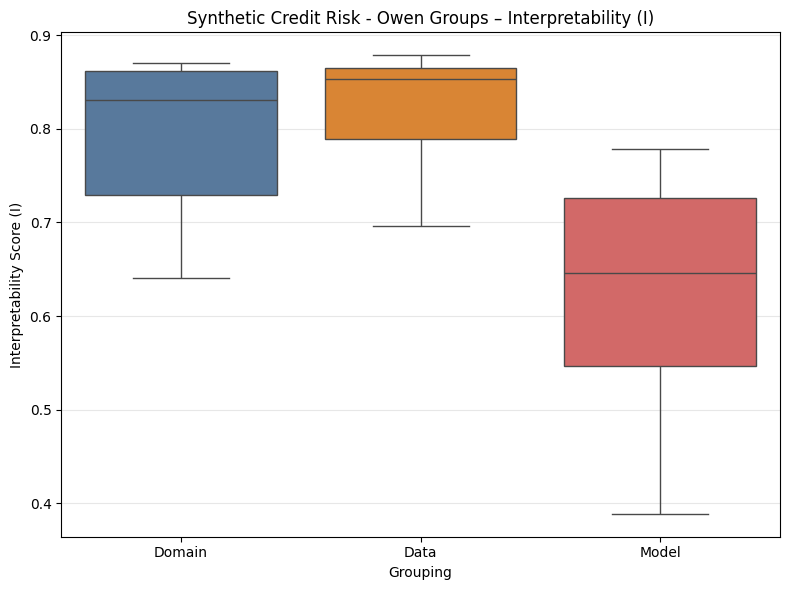

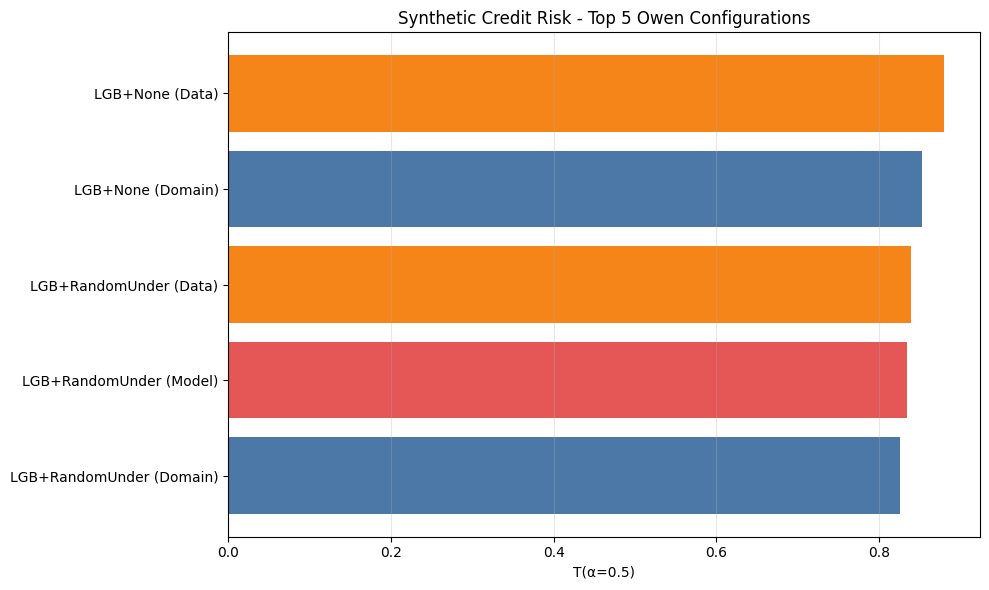


✓ Owen-specific plots generated and saved.

================ STATISTICAL VALIDATION SUITE — EXPLAINERS ================

Explainers present: ['SHAP' 'Banzhaf' 'Myerson' 'Owen-Domain' 'Owen-Data' 'Owen-Model']

================ Friedman's Test for Explainer Comparisons ================


Friedman test on AUC:
  AUC: stat=nan, p=nan (not significant)
    Kendall's W (effect size): nan
    Explainers compared: ['Banzhaf', 'Myerson', 'Owen-Data', 'Owen-Domain', 'Owen-Model', 'SHAP']

Friedman test on I:
  I: stat=62.276, p=0.0000 (significant)
    Kendall's W (effect size): 0.8303
    Explainers compared: ['Banzhaf', 'Myerson', 'Owen-Data', 'Owen-Domain', 'Owen-Model', 'SHAP']

Friedman test on T(α=0.5):
  T(α=0.5): stat=62.276, p=0.0000 (significant)
    Kendall's W (effect size): 0.8303
    Explainers compared: ['Banzhaf', 'Myerson', 'Owen-Data', 'Owen-Domain', 'Owen-Model', 'SHAP']

================ Wilcoxon Signed-Rank Tests (Explainers) ================


Wilcoxon Test for AUC:
  SHA

In [3]:
# ============================================================
# SYNTHETIC CREDIT RISK DATASET - COMPLETE GAME THEORY EXPLAINABILITY
# ============================================================

# Install required libraries
!pip install xgboost
!pip install shap
!pip install imbalanced-learn
!pip install lightgbm
!pip install scikit-posthocs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import shap
import networkx as nx
from scipy import stats
from scipy.spatial.distance import cosine
from sklearn.cluster import AgglomerativeClustering
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare, wilcoxon, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

# ============================================================
# 1. LOAD AND PREPROCESS SYNTHETIC CREDIT RISK DATASET
# ============================================================
print("\n" + "="*80)
print("LOADING AND PREPROCESSING SYNTHETIC CREDIT RISK DATASET")
print("="*80)

# Load the dataset from Kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the dataset
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "emirhanakku/synthetic-credit-risk-dataset-extreme-imbalance",
    "synthetic_credit_risk.csv"
)

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst 5 records:")
print(df.head())
print(f"\nDataset info:")
print(df.info())
print(f"\nTarget distribution:")
print(df['target'].value_counts())
print(f"Default rate: {(df['target'].mean() * 100):.4f}%")

# Prepare features and target
if 'target' in df.columns:
    X = df.drop('target', axis=1)
    y = df['target']
else:
    # Assume last column is target
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    print(f"\nAssuming last column '{df.columns[-1]}' as target")

# Convert any non-numeric columns that should be numeric
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            # Try to convert to numeric
            X[col] = pd.to_numeric(X[col], errors='ignore')
        except:
            pass

print(f"\nFeature dtypes after conversion:")
print(X.dtypes)

# Identify categorical and numeric columns properly
cat_cols = []
num_cols = []

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        cat_cols.append(col)
    elif X[col].dtype in ['int64', 'float64', 'int32', 'float32', 'int', 'float']:
        # Check if it's actually categorical with few unique values
        if X[col].nunique() < 10 and X[col].dtype in ['int64', 'int32', 'int']:
            cat_cols.append(col)
        else:
            num_cols.append(col)

print(f"\nCategorical columns ({len(cat_cols)}): {cat_cols}")
print(f"Numeric columns ({len(num_cols)}): {num_cols}")

# For columns identified as categorical, convert them to string type
for col in cat_cols:
    if X[col].dtype != 'object':
        X[col] = X[col].astype(str)

# Handle any NaN values
X = X.fillna(X.mean(numeric_only=True))
# For categorical columns, fill with mode
for col in cat_cols:
    if col in X.columns:
        if X[col].isna().any():
            X[col] = X[col].fillna(X[col].mode()[0] if not X[col].mode().empty else 'missing')

print(f"\nMissing values after handling:")
print(X.isna().sum())

print(f"\nFinal dataset shape: X={X.shape}, y={y.shape}")
print(f"Target distribution: {pd.Series(y).value_counts().to_dict()}")
print(f"Imbalance ratio: {sum(y==0)/sum(y==1):.2f}:1")

# Create preprocessing pipeline
if len(cat_cols) > 0:
    # Get unique categories for each categorical column
    cat_categories = []
    for col in cat_cols:
        unique_vals = X[col].dropna().unique().tolist()
        # Ensure there are actual values
        if len(unique_vals) > 0:
            cat_categories.append(sorted(unique_vals))
        else:
            cat_categories.append(['missing'])

    print(f"\nCategorical categories:")
    for col, cats in zip(cat_cols, cat_categories):
        print(f"  {col}: {len(cats)} categories")

    preprocessor = ColumnTransformer([
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore',
                             sparse_output=False, categories=cat_categories), cat_cols),
        ('num', StandardScaler(), num_cols)
    ])
else:
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols)
    ])

# Fit preprocessor
try:
    X_processed = preprocessor.fit_transform(X)
    d = X_processed.shape[1]
    print(f"\nNumber of processed features: {d}")
    print(f"Preprocessed shape: {X_processed.shape}")
except Exception as e:
    print(f"Error in preprocessing: {e}")
    # Try a simpler approach
    print("\nTrying alternative preprocessing...")

    # Handle categorical columns manually
    X_processed = X.copy()

    # One-hot encode categorical columns
    for col in cat_cols:
        dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
        X_processed = pd.concat([X_processed.drop(col, axis=1), dummies], axis=1)

    # Scale numeric columns
    scaler = StandardScaler()
    X_processed[num_cols] = scaler.fit_transform(X_processed[num_cols])

    X_processed = X_processed.values
    d = X_processed.shape[1]
    print(f"\nNumber of processed features (alternative): {d}")
    print(f"Preprocessed shape: {X_processed.shape}")

# ============================================================
# 2. MODELS & SAMPLING STRATEGIES
# ============================================================
models = {
    'RF': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'XGB': xgb.XGBClassifier(n_estimators=100, max_depth=6, random_state=42,
                            eval_metric='logloss', n_jobs=-1),
    'LGB': lgb.LGBMClassifier(n_estimators=100, max_depth=6, random_state=42,
                             verbose=-1, n_jobs=-1)
}

resamplers = {
    'None': None,
    'SMOTE': SMOTE(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42),
    'RandomUnder': RandomUnderSampler(random_state=42),
    'CostSensitive': 'cost'
}

# Compute class weights
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = {int(cls): float(w) for cls, w in zip(classes, weights)}
print(f"\nClass weights: {class_weight_dict}")

# ============================================================
# 3. EXPLANATION METHODS
# ============================================================
def get_shap_reliable(pipe, X_test):
    """Get SHAP values reliably"""
    clf = pipe.named_steps['clf']
    X_proc = pipe.named_steps['prep'].transform(X_test)

    try:
        explainer = shap.TreeExplainer(clf)
        sv = explainer.shap_values(X_proc)

        if isinstance(sv, list):
            return sv[1]
        elif sv.ndim == 3:
            return sv[:, :, 1]
        else:
            return sv
    except Exception as e:
        print(f"SHAP failed: {e}")
        # Fallback to permutation importance
        from sklearn.inspection import permutation_importance
        res = permutation_importance(clf, X_proc, pipe.predict(X_proc),
                                     n_repeats=3, random_state=42)
        return np.tile(res.importances_mean, (X_proc.shape[0], 1))

def compute_banzhaf(pipe, X_test, n_samples=5, max_instances=5):
    """Compute Banzhaf values"""
    clf = pipe.named_steps['clf']
    X_proc = pipe.named_steps['prep'].transform(X_test)
    n_feat = X_proc.shape[1]
    n_inst = min(max_instances, X_proc.shape[0])
    mat = np.zeros((n_inst, n_feat))

    for i in range(n_inst):
        x = X_proc[i:i+1]
        for f in range(n_feat):
            contrib = []
            for _ in range(n_samples):
                # Create random coalition
                coal = np.random.binomial(1, 0.5, n_feat)

                # With feature f
                x_with = x.copy()
                x_with[0, f] = x[0, f] * coal[f]
                p1 = clf.predict_proba(x_with)[0, 1]

                # Without feature f
                x_without = x.copy()
                x_without[0, f] = 0
                p0 = clf.predict_proba(x_without)[0, 1]

                contrib.append(p1 - p0)
            mat[i, f] = np.mean(contrib)

    return mat

def build_feature_graph(preprocessor, X, threshold=0.25):
    """Build feature graph based on correlation"""
    X_proc = preprocessor.transform(X)
    corr = np.corrcoef(X_proc.T)

    G = nx.Graph()
    d = corr.shape[0]
    G.add_nodes_from(range(d))

    for i in range(d):
        for j in range(i+1, d):
            if abs(corr[i, j]) >= threshold:
                G.add_edge(i, j, weight=corr[i, j])

    return G, corr

def myerson_value(pipe, X_test, G, alpha=0.5, max_instances=50):
    """Compute Myerson values"""
    shap_vals = get_shap_reliable(pipe, X_test)
    shap_mean = shap_vals.mean(axis=0)
    d = len(shap_mean)
    phi = np.zeros(d)

    for i in range(d):
        neighbors = list(G.neighbors(i))
        if len(neighbors) == 0:
            phi[i] = shap_mean[i]
        else:
            neighbor_mean = np.mean([shap_mean[j] for j in neighbors])
            phi[i] = (1 - alpha) * shap_mean[i] + alpha * neighbor_mean

    n_out = min(max_instances, len(X_test))
    return np.tile(phi, (n_out, 1))

def get_feature_names_out(preprocessor):
    """Get feature names after preprocessing"""
    try:
        return preprocessor.get_feature_names_out()
    except:
        # If preprocessor doesn't have get_feature_names_out, create manual names
        if hasattr(preprocessor, 'transformers'):
            feature_names = []
            for name, trans, cols in preprocessor.transformers:
                if hasattr(trans, 'get_feature_names_out'):
                    feature_names.extend(trans.get_feature_names_out(cols))
                elif name == 'num':
                    feature_names.extend(cols)
            return np.array(feature_names)
        else:
            return np.array([f'feature_{i}' for i in range(X_processed.shape[1])])

def build_domain_groups_synthetic(fnames):
    """Build domain-driven groups for synthetic credit risk"""
    groups = {
        "Demographic": [],
        "Financial": [],
        "CreditBehavior": [],
        "Transaction": [],
        "DeviceEmployment": []
    }

    for i, name in enumerate(fnames):
        lname = name.lower()

        # Demographic features
        if any(k in lname for k in ["age", "region", "education"]):
            groups["Demographic"].append(i)

        # Financial features
        if any(k in lname for k in ["income", "debt", "credit_util", "internal_score"]):
            groups["Financial"].append(i)

        # Credit behavior
        if any(k in lname for k in ["payment_delay", "last_payment"]):
            groups["CreditBehavior"].append(i)

        # Transaction features
        if any(k in lname for k in ["transaction", "avg_amount"]):
            groups["Transaction"].append(i)

        # Device and employment
        if any(k in lname for k in ["device", "employment", "job"]):
            groups["DeviceEmployment"].append(i)

    return {g: v for g, v in groups.items() if len(v) > 0}

def build_data_groups(X_proc, n_groups=6):
    """Build data-driven groups using correlation clustering"""
    try:
        X_proc = np.nan_to_num(X_proc, nan=0.0)
        with np.errstate(invalid='ignore'):
            corr = np.corrcoef(X_proc.T)

        corr = np.nan_to_num(corr, nan=0.0, posinf=0.0, neginf=0.0)
        np.fill_diagonal(corr, 1.0)
        corr = np.clip(corr, -1.0, 1.0)

        dist = 1 - np.abs(corr)
        dist = np.clip(dist, 0.0, 2.0)

        if X_proc.shape[1] < n_groups:
            n_groups = max(2, X_proc.shape[1] // 2)

        clustering = AgglomerativeClustering(
            n_clusters=n_groups,
            metric='precomputed',
            linkage='average'
        )
        labels = clustering.fit_predict(dist)

        groups = {}
        for idx, lab in enumerate(labels):
            groups.setdefault(f"Cluster_{lab}", []).append(idx)

        return groups, np.abs(corr)
    except Exception as e:
        print(f"Data-driven grouping failed: {e}")
        n_features = X_proc.shape[1]
        return {"Default_Group": list(range(n_features))}, np.eye(n_features)

def build_model_groups(shap_vals, n_groups=6):
    """Build model-driven groups from SHAP values"""
    try:
        shap_vals = np.nan_to_num(shap_vals, nan=0.0)

        if shap_vals.ndim == 1:
            shap_vals = shap_vals.reshape(1, -1)
        elif shap_vals.ndim == 3:
            shap_vals = shap_vals.mean(axis=2) if shap_vals.shape[2] > 1 else shap_vals.squeeze()

        if shap_vals.shape[0] < shap_vals.shape[1]:
            shap_vals = shap_vals.T

        if shap_vals.shape[0] < 2:
            n_features = shap_vals.shape[1] if shap_vals.shape[0] == 1 else shap_vals.shape[0]
            return {"Default_Group": list(range(n_features))}, np.eye(n_features)

        with np.errstate(invalid='ignore'):
            corr = np.corrcoef(shap_vals)

        corr = np.nan_to_num(corr, nan=0.0, posinf=0.0, neginf=0.0)
        np.fill_diagonal(corr, 1.0)
        corr = np.clip(corr, -1.0, 1.0)

        dist = 1 - np.abs(corr)
        dist = np.clip(dist, 0.0, 2.0)

        n_features = corr.shape[0]
        if n_features < n_groups:
            n_groups = max(2, n_features // 2)

        clustering = AgglomerativeClustering(
            n_clusters=n_groups,
            metric='precomputed',
            linkage='average'
        )
        labels = clustering.fit_predict(dist)

        groups = {}
        for idx, lab in enumerate(labels):
            groups.setdefault(f"SHAPGroup_{lab}", []).append(idx)

        return groups, np.abs(corr)
    except Exception as e:
        print(f"Model-driven grouping failed: {e}")
        n_features = shap_vals.shape[1] if shap_vals.ndim > 1 else shap_vals.shape[0]
        return {"Default_Group": list(range(n_features))}, np.eye(n_features)

def owen_from_shap(phi, groups):
    """Compute Owen values from SHAP values using groups"""
    d = len(phi)
    out = np.zeros(d)

    for _, feats in groups.items():
        if len(feats) == 0:
            continue

        valid_feats = [f for f in feats if f < d]
        if not valid_feats:
            continue

        total = np.sum(np.abs(phi[valid_feats]))
        per = total / len(valid_feats)

        for f in valid_feats:
            sign = np.sign(phi[f]) if phi[f] != 0 else 1
            out[f] = sign * per

    return out

def compute_Q(groups, dep):
    """Compute group quality metric Q = within-group dependence / across-group dependence"""
    try:
        d = dep.shape[0]
        group_id = np.full(d, -1)

        # Assign group IDs
        for gid, (_, feats) in enumerate(groups.items()):
            for f in feats:
                if 0 <= f < d:
                    group_id[f] = gid

        within, across = [], []

        for i in range(d):
            for j in range(i+1, d):
                if group_id[i] == -1 or group_id[j] == -1:
                    continue
                if group_id[i] == group_id[j]:
                    within.append(dep[i, j])
                else:
                    across.append(dep[i, j])

        if len(within) == 0 or len(across) == 0:
            return np.nan

        w = float(np.mean(within))
        a = float(np.mean(across))

        if a == 0:
            return np.nan

        return w / a

    except Exception:
        return np.nan

def stability_cv(expl_list):
    """Compute stability (coefficient of variation)"""
    if len(expl_list) < 2:
        return 1.0

    try:
        arr = np.stack([np.abs(e) for e in expl_list])
        mean = arr.mean(axis=0) + 1e-8
        std = arr.std(axis=0)
        cv_per_feature = std / mean
        return float(np.mean(cv_per_feature))
    except:
        return 1.0

def kuncheva_index(expl_list, k=5):
    """Compute Kuncheva index for top-K feature consistency"""
    if len(expl_list) < 2:
        return 0.0

    sets = []
    for exp in expl_list:
        try:
            imp = np.abs(exp).mean(axis=0).ravel()
            topk = min(k, len(imp))
            topk_indices = set(np.argsort(imp)[-topk:].tolist())
            sets.append(topk_indices)
        except:
            sets.append(set())

    if len(sets) < 2:
        return 0.0

    ki_values = []
    for i in range(len(sets)):
        for j in range(i+1, len(sets)):
            intersection = len(sets[i] & sets[j])
            if k == d:
                ki = 0.0
            else:
                ki = (intersection - (k**2)/d) / (k - (k**2)/d)
                ki = max(min(ki, 1.0), -1.0)
            ki_values.append(ki)

    return float(np.mean(ki_values)) if ki_values else 0.0

def cosine_directional_consistency(expl_list):
    """Compute cosine similarity between explanation vectors"""
    if len(expl_list) < 2:
        return 1.0

    try:
        mean_vecs = [np.mean(np.abs(e), axis=0).ravel() for e in expl_list]

        cos_sims = []
        for i in range(len(mean_vecs)):
            for j in range(i+1, len(mean_vecs)):
                if np.linalg.norm(mean_vecs[i]) == 0 or np.linalg.norm(mean_vecs[j]) == 0:
                    cos_sim = 0.0
                else:
                    cos_sim = 1 - cosine(mean_vecs[i], mean_vecs[j])
                cos_sims.append(cos_sim)

        return float(np.mean(cos_sims)) if cos_sims else 0.0
    except:
        return 0.0

def interpretability_score(cv, kuncheva, cosine_sim, beta=0.3):
    """Compute overall interpretability score"""
    return beta * (1 - cv) + beta * kuncheva + beta * cosine_sim

def normalize(s):
    """Normalize a series to [0,1]"""
    return (s - s.min()) / (s.max() - s.min() + 1e-8)

def tradeoff_metric(auc_series, I_series, alpha=0.5):
    """Compute trade-off metric between AUC and interpretability"""
    return alpha * normalize(auc_series) + (1 - alpha) * normalize(I_series)

# ============================================================
# 4. MAIN EXPERIMENT LOOP
# ============================================================
print("\n" + "="*80)
print("STARTING COMPREHENSIVE EXPERIMENT - SYNTHETIC CREDIT RISK DATASET")
print("="*80)

# Build feature graph for Myerson
print("\nBuilding feature graph for Myerson value...")
G_myerson, _ = build_feature_graph(preprocessor, X, threshold=0.25)
print(f"Graph built with {G_myerson.number_of_nodes()} nodes and {G_myerson.number_of_edges()} edges")

# Setup cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
all_records = []

# Main experiment loop
for mname, model in models.items():
    for sname, sampler in resamplers.items():
        print(f"\n{'='*60}")
        print(f"Processing: {mname} + {sname}")
        print(f"{'='*60}")

        # Store results for each method
        aucs = []
        shap_runs, banzhaf_runs, myerson_runs = [], [], []
        owen_domain_runs, owen_data_runs, owen_model_runs = [], [], []

        for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
            X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
            y_tr, y_te = y[train_idx], y[test_idx]

            # Create pipeline
            steps = [('prep', preprocessor)]
            if sampler and sampler != 'cost':
                steps.append(('samp', sampler))
            steps.append(('clf', model))
            pipe = ImbPipeline(steps)

            # Apply cost-sensitive learning if needed
            if sname == 'CostSensitive':
                if mname == 'RF':
                    pipe.named_steps['clf'].set_params(class_weight=class_weight_dict)
                elif mname == 'XGB':
                    ratio = class_weight_dict[1] / class_weight_dict[0]
                    pipe.named_steps['clf'].set_params(scale_pos_weight=ratio)
                elif mname == 'LGB':
                    pipe.named_steps['clf'].set_params(class_weight=class_weight_dict)

            # Train model
            pipe.fit(X_tr, y_tr)

            # Compute AUC
            try:
                auc = roc_auc_score(y_te, pipe.predict_proba(X_te)[:, 1])
                aucs.append(auc)
                print(f"  Fold {fold}: AUC = {auc:.4f}")
            except:
                aucs.append(0.5)
                print(f"  Fold {fold}: AUC calculation failed, using 0.5")

            # Sample for explanations
            sample_size = min(50, len(X_te))
            if sample_size > 0:
                X_sample = X_te.sample(n=sample_size, random_state=42)
            else:
                X_sample = X_te.copy()

            # 1. SHAP
            try:
                shap_vals = get_shap_reliable(pipe, X_sample)
                shap_runs.append(shap_vals)
            except Exception as e:
                print(f"    SHAP failed: {e}")
                n_features = preprocessor.transform(X_sample[:1]).shape[1]
                shap_runs.append(np.zeros((sample_size, n_features)))

            # 2. Banzhaf
            try:
                banzhaf_vals = compute_banzhaf(pipe, X_sample)
                banzhaf_runs.append(banzhaf_vals)
            except Exception as e:
                print(f"    Banzhaf failed: {e}")
                n_features = preprocessor.transform(X_sample[:1]).shape[1]
                banzhaf_runs.append(np.zeros((min(5, sample_size), n_features)))

            # 3. Myerson
            try:
                myerson_vals = myerson_value(pipe, X_sample, G_myerson)
                myerson_runs.append(myerson_vals)
            except Exception as e:
                print(f"    Myerson failed: {e}")
                n_features = preprocessor.transform(X_sample[:1]).shape[1]
                myerson_runs.append(np.zeros((sample_size, n_features)))

            # 4. Owen with different grouping strategies
            try:
                # Get SHAP values for Owen
                shap_vals_owen = get_shap_reliable(pipe, X_sample)
                phi = np.mean(shap_vals_owen, axis=0)

                # Get feature names
                fnames = get_feature_names_out(preprocessor)

                # Domain-driven groups
                dom_groups = build_domain_groups_synthetic(fnames)
                owen_domain_vals = np.tile(owen_from_shap(phi, dom_groups),
                                          (sample_size, 1))
                owen_domain_runs.append(owen_domain_vals)

                # Data-driven groups
                X_tr_proc = pipe.named_steps['prep'].transform(X_tr)
                data_groups, _ = build_data_groups(X_tr_proc)
                owen_data_vals = np.tile(owen_from_shap(phi, data_groups),
                                        (sample_size, 1))
                owen_data_runs.append(owen_data_vals)

                # Model-driven groups
                sample_tr_size = min(100, len(X_tr))
                X_tr_sample = X_tr.sample(n=sample_tr_size, random_state=42)
                shap_tr = get_shap_reliable(pipe, X_tr_sample)
                model_groups, _ = build_model_groups(shap_tr)
                owen_model_vals = np.tile(owen_from_shap(phi, model_groups),
                                         (sample_size, 1))
                owen_model_runs.append(owen_model_vals)

            except Exception as e:
                print(f"    Owen failed: {e}")
                n_features = preprocessor.transform(X_sample[:1]).shape[1]
                zeros = np.zeros((sample_size, n_features))
                owen_domain_runs.append(zeros)
                owen_data_runs.append(zeros)
                owen_model_runs.append(zeros)

        # Compute average AUC
        auc_mean = np.mean(aucs) if aucs else 0.5

        # Process results for each method
        method_runs = [
            ('SHAP', shap_runs),
            ('Banzhaf', banzhaf_runs),
            ('Myerson', myerson_runs),
            ('Owen_Domain', owen_domain_runs),
            ('Owen_Data', owen_data_runs),
            ('Owen_Model', owen_model_runs)
        ]

        for method_name, runs in method_runs:
            if runs:  # Only process if we have results
                try:
                    cv_val = stability_cv(runs)
                    kun_val = kuncheva_index(runs, k=min(5, d))
                    cos_val = cosine_directional_consistency(runs)
                    I_val = interpretability_score(cv_val, kun_val, cos_val)

                    # Extract grouping type for Owen methods
                    if method_name.startswith('Owen_'):
                        grouping = method_name.split('_')[1]
                        method_base = 'Owen'
                    else:
                        grouping = 'None'
                        method_base = method_name

                    all_records.append({
                        'Dataset': 'SyntheticCreditRisk',
                        'Model': mname,
                        'Sampler': sname,
                        'Method': method_base,
                        'Grouping': grouping,
                        'AUC': auc_mean,
                        'CV': cv_val,
                        'Stability': 1 - cv_val,
                        'Kuncheva': kun_val,
                        'Cosine': cos_val,
                        'I': I_val
                    })
                except Exception as e:
                    print(f"Error processing {method_name}: {e}")

# ============================================================
# 5. PROCESS AND SAVE RESULTS
# ============================================================
print("\n" + "="*80)
print("PROCESSING RESULTS - SYNTHETIC CREDIT RISK DATASET")
print("="*80)

if all_records:
    metrics = pd.DataFrame(all_records)
    metrics['T(α=0.5)'] = tradeoff_metric(metrics['AUC'], metrics['I'])

    print("\nComplete Results (Synthetic Credit Risk Dataset):")
    print(metrics.round(4).to_string(index=False))

    # Save results
    metrics.to_csv('synthetic_credit_complete_results.csv', index=False)
    print("\n✓ Results saved to: synthetic_credit_complete_results.csv")

    # Summary by method
    print("\n" + "="*80)
    print("SUMMARY BY EXPLANATION METHOD - SYNTHETIC CREDIT RISK")
    print("="*80)

    summary_method = metrics.groupby('Method').agg({
        'AUC': 'mean',
        'Stability': 'mean',
        'Kuncheva': 'mean',
        'Cosine': 'mean',
        'I': 'mean',
        'T(α=0.5)': 'mean'
    }).round(4)
    print(summary_method)

    # Best configurations
    print("\n" + "="*80)
    print("TOP 5 CONFIGURATIONS - SYNTHETIC CREDIT RISK")
    print("="*80)

    top5 = metrics.nlargest(5, 'T(α=0.5)')[['Model', 'Sampler', 'Method', 'Grouping',
                                           'AUC', 'I', 'T(α=0.5)']]
    print(top5.round(4).to_string(index=False))

else:
    print("No results generated!")

print("\n" + "="*80)
print("SYNTHETIC CREDIT RISK DATASET EXPERIMENT COMPLETE!")
print("="*80)

# ============================================================
# 6. STATISTICAL VALIDATION & COMPARATIVE VISUALIZATION
# ============================================================

print("\n" + "="*80)
print("STATISTICAL VALIDATION & COMPARATIVE VISUALIZATION")
print("="*80)

# ------------------------------------------------------------
# 6.0 Sanity: ensure metrics exists and is non-empty
# ------------------------------------------------------------
if 'metrics' not in globals() or metrics.empty:
    raise ValueError("metrics DataFrame is missing or empty. Run the main experiment first.")

# ------------------------------------------------------------
# 6.1 Statistical Tests (Corrected Friedman)
# ------------------------------------------------------------

# Create a simplified configuration ID
metrics['Config_Simple'] = metrics['Model'] + '+' + metrics['Method']

print("\n1. FRIEDMAN TEST - AUC (Corrected):")

# Pivot: rows = (Model, Sampler), columns = Method
auc_pivot = metrics.pivot_table(
    index=['Model', 'Sampler'],
    columns='Method',
    values='AUC',
    aggfunc='mean'
)

# Drop methods with missing values
auc_pivot = auc_pivot.dropna(axis=1, how='any')
auc_matrix = auc_pivot.values

if auc_matrix.shape[1] >= 3:
    stat, p_value = friedmanchisquare(*[auc_matrix[:, i] for i in range(auc_matrix.shape[1])])
    print(f"Statistic: {stat:.4f}, p-value: {p_value:.6f}")
    if p_value < 0.05:
        print("✓ Significant differences in AUC across methods")
else:
    print("Not enough methods with complete AUC data for Friedman test.")

print("\n2. FRIEDMAN TEST - Interpretability (I) (Corrected):")

I_pivot = metrics.pivot_table(
    index=['Model', 'Sampler'],
    columns='Method',
    values='I',
    aggfunc='mean'
)
I_pivot = I_pivot.dropna(axis=1, how='any')
I_matrix = I_pivot.values

if I_matrix.shape[1] >= 3:
    stat, p_value = friedmanchisquare(*[I_matrix[:, i] for i in range(I_matrix.shape[1])])
    print(f"Statistic: {stat:.4f}, p-value: {p_value:.6f}")
    if p_value < 0.05:
        print("✓ Significant differences in Interpretability across methods")
else:
    print("Not enough methods with complete I data for Friedman test.")

# ------------------------------------------------------------
# 6.2 Comparative Plots
# ------------------------------------------------------------

fig = plt.figure(figsize=(18, 12))
fig.suptitle('Synthetic Credit Risk - Comparative Analysis', fontsize=16, fontweight='bold')

# Plot 1: AUC by Model and Method
ax1 = plt.subplot(2, 3, 1)
sns.boxplot(data=metrics, x='Model', y='AUC', hue='Method', ax=ax1)
ax1.set_title('AUC Distribution by Model & Explanation Method')
ax1.set_ylabel('AUC Score')
ax1.legend(title='Explanation Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot 2: Interpretability by Model and Method
ax2 = plt.subplot(2, 3, 2)
sns.boxplot(data=metrics, x='Model', y='I', hue='Method', ax=ax2)
ax2.set_title('Interpretability Distribution by Model & Method')
ax2.set_ylabel('Interpretability Score (I)')
ax2.legend(title='Explanation Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Plot 3: Trade-off Metric by Sampler
ax3 = plt.subplot(2, 3, 3)
sns.boxplot(data=metrics, x='Sampler', y='T(α=0.5)', hue='Method', ax=ax3)
ax3.set_title('Trade-off Metric by Sampling Strategy & Method')
ax3.set_ylabel('Trade-off Score T(α=0.5)')
ax3.legend(title='Explanation Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')

# Plot 4: AUC vs Interpretability Scatter
ax4 = plt.subplot(2, 3, 4)
for method in metrics['Method'].unique():
    subset = metrics[metrics['Method'] == method]
    ax4.scatter(subset['AUC'], subset['I'], label=method, alpha=0.6, s=80)
ax4.set_xlabel('AUC Score')
ax4.set_ylabel('Interpretability Score (I)')
ax4.set_title('AUC vs Interpretability Trade-off')
ax4.legend(title='Explanation Method', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)
# optional reference line
ax4.plot([metrics['AUC'].min(), metrics['AUC'].max()],
         [metrics['I'].min(), metrics['I'].max()], 'k--', alpha=0.3)

# Plot 5: Stability Comparison
ax5 = plt.subplot(2, 3, 5)
stability_data = metrics.pivot_table(
    index='Config_Simple',
    values=['Stability', 'Kuncheva', 'Cosine'],
    aggfunc='mean'
)
stability_data.plot(kind='bar', ax=ax5, width=0.8)
ax5.set_title('Stability Metrics by Configuration')
ax5.set_ylabel('Score')
ax5.set_xlabel('Configuration (Model+Method)')
plt.setp(ax5.get_xticklabels(), rotation=45, ha='right')
ax5.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 6: Top 5 Configurations Radar Chart
ax6 = plt.subplot(2, 3, 6, projection='polar')
top5_configs = metrics.nlargest(5, 'T(α=0.5)')

categories = ['AUC', 'I', 'Stability', 'Kuncheva', 'Cosine']
N = len(categories)

for _, row in top5_configs.iterrows():
    values = [row['AUC'], row['I'], row['Stability'], row['Kuncheva'], row['Cosine']]
    values_norm = []
    for v, cat in zip(values, categories):
        vmin = metrics[cat].min()
        vmax = metrics[cat].max()
        values_norm.append((v - vmin) / (vmax - vmin + 1e-8))

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    values_norm += values_norm[:1]
    angles += angles[:1]

    label = f"{row['Model']}+{row['Method'][:4]}"
    ax6.plot(angles, values_norm, linewidth=2, label=label, alpha=0.7)
    ax6.fill(angles, values_norm, alpha=0.1)

ax6.set_xticks(angles[:-1])
ax6.set_xticklabels(categories)
ax6.set_title('Top 5 Configurations Radar Chart')
ax6.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.savefig('synthetic_credit_comparative_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Comparative plots saved as: synthetic_credit_comparative_analysis.png")

# ------------------------------------------------------------
# 6.3 Compact Statistical Summary Table
# ------------------------------------------------------------

print("\n" + "="*80)
print("COMPACT STATISTICAL SUMMARY")
print("="*80)

summary_stats = metrics.groupby(['Model', 'Method']).agg({
    'AUC': ['mean', 'std', 'count'],
    'I': ['mean', 'std'],
    'T(α=0.5)': ['mean', 'std']
}).round(4)

print("\nPerformance Summary (mean ± std):")
print(summary_stats)

# ------------------------------------------------------------
# 6.4 Pairwise Comparisons (Top Methods)
# ------------------------------------------------------------

print("\n" + "="*80)
print("PAIRWISE COMPARISONS (Top Methods)")
print("="*80)

methods_to_compare = ['SHAP', 'Owen', 'Banzhaf', 'Myerson']
available_methods = [m for m in methods_to_compare if m in metrics['Method'].unique()]

for i in range(len(available_methods)):
    for j in range(i+1, len(available_methods)):
        method1 = available_methods[i]
        method2 = available_methods[j]

        data1 = metrics[metrics['Method'] == method1]['T(α=0.5)'].values
        data2 = metrics[metrics['Method'] == method2]['T(α=0.5)'].values

        if len(data1) > 1 and len(data2) > 1:
            stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
            mean1, mean2 = np.mean(data1), np.mean(data2)

            print(f"\n{method1} vs {method2}:")
            print(f"  Means: {method1}={mean1:.4f}, {method2}={mean2:.4f}")
            print(f"  Mann-Whitney U: {stat:.4f}, p={p_value:.6f}")

            if p_value < 0.05:
                if mean1 > mean2:
                    print(f"  ✓ {method1} significantly better (p < 0.05)")
                else:
                    print(f"  ✓ {method2} significantly better (p < 0.05)")

# ------------------------------------------------------------
# 6.5 Best Configuration Analysis
# ------------------------------------------------------------

print("\n" + "="*80)
print("BEST CONFIGURATION ANALYSIS")
print("="*80)

best_by_auc = metrics.loc[metrics['AUC'].idxmax()]
best_by_I = metrics.loc[metrics['I'].idxmax()]
best_by_T = metrics.loc[metrics['T(α=0.5)'].idxmax()]

print("\nBest by AUC:")
print(f"  Configuration: {best_by_auc['Model']}+{best_by_auc['Sampler']}+{best_by_auc['Method']}")
print(f"  AUC: {best_by_auc['AUC']:.4f}, I: {best_by_auc['I']:.4f}, T: {best_by_auc['T(α=0.5)']:.4f}")

print("\nBest by Interpretability (I):")
print(f"  Configuration: {best_by_I['Model']}+{best_by_I['Sampler']}+{best_by_I['Method']}")
print(f"  AUC: {best_by_I['AUC']:.4f}, I: {best_by_I['I']:.4f}, T: {best_by_I['T(α=0.5)']:.4f}")

print("\nBest by Trade-off T(α=0.5):")
print(f"  Configuration: {best_by_T['Model']}+{best_by_T['Sampler']}+{best_by_T['Method']}")
print(f"  AUC: {best_by_T['AUC']:.4f}, I: {best_by_T['I']:.4f}, T: {best_by_T['T(α=0.5)']:.4f}")

# ------------------------------------------------------------
# 6.6 Heatmap Visualization
# ------------------------------------------------------------

fig2, axes2 = plt.subplots(1, 2, figsize=(16, 6))

heatmap_data1 = metrics.pivot_table(
    index='Model',
    columns='Method',
    values='AUC',
    aggfunc='mean'
)
sns.heatmap(heatmap_data1, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes2[0])
axes2[0].set_title('Average AUC by Model & Explanation Method')
axes2[0].set_xlabel('Explanation Method')
axes2[0].set_ylabel('Model')

heatmap_data2 = metrics.pivot_table(
    index='Model',
    columns='Method',
    values='T(α=0.5)',
    aggfunc='mean'
)
sns.heatmap(heatmap_data2, annot=True, fmt='.3f', cmap='RdYlGn', ax=axes2[1])
axes2[1].set_title('Average Trade-off T(α=0.5) by Model & Explanation Method')
axes2[1].set_xlabel('Explanation Method')
axes2[1].set_ylabel('Model')

plt.tight_layout()
plt.savefig('synthetic_credit_heatmaps.png', dpi=300, bbox_inches='tight')
print("\n✓ Heatmaps saved as: synthetic_credit_heatmaps.png")

# ------------------------------------------------------------
# 6.7 Final Summary Statistics
# ------------------------------------------------------------

print("\n" + "="*80)
print("FINAL SUMMARY STATISTICS")
print("="*80)

print(f"\nTotal Configurations Tested: {len(metrics)}")
print(f"Best AUC Achieved: {metrics['AUC'].max():.4f}")
print(f"Best Interpretability (I): {metrics['I'].max():.4f}")
print(f"Best Trade-off T(α=0.5): {metrics['T(α=0.5)'].max():.4f}")

method_ranking = metrics.groupby('Method')['T(α=0.5)'].mean().sort_values(ascending=False)
print("\nMethod Ranking by Average Trade-off T(α=0.5):")
for rank, (method, score) in enumerate(method_ranking.items(), 1):
    print(f"  {rank}. {method}: {score:.4f}")

model_ranking = metrics.groupby('Model')['T(α=0.5)'].mean().sort_values(ascending=False)
print("\nModel Ranking by Average Trade-off T(α=0.5):")
for rank, (model, score) in enumerate(model_ranking.items(), 1):
    print(f"  {rank}. {model}: {score:.4f}")

plt.show()
print("\n" + "="*80)
print("SYNTHETIC CREDIT RISK - STATISTICAL VALIDATION & VISUALIZATION COMPLETE!")
print("="*80)

# ============================================================
# 7. OWEN GROUPS – DEDICATED VISUALIZATIONS
# ============================================================

print("\n" + "="*80)
print("OWEN GROUPS – DEDICATED VISUALIZATIONS")
print("="*80)

# Filter only Owen rows
owen = metrics[metrics['Method'] == 'Owen'].copy()

if not owen.empty and 'Grouping' in owen.columns:
    # Color palette for groups
    group_colors = {
        'Domain': '#4C78A8',
        'Data': '#F58518',
        'Model': '#E45756'
    }

    # 1. Trade-off by Owen Grouping
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=owen, x='Grouping', y='T(α=0.5)', palette=group_colors)
    plt.title("Synthetic Credit Risk - Owen Groups – Trade-off T(α=0.5)")
    plt.ylabel("T(α=0.5)")
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('synthetic_owen_tradeoff.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 2. Interpretability by Owen Grouping
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=owen, x='Grouping', y='I', palette=group_colors)
    plt.title("Synthetic Credit Risk - Owen Groups – Interpretability (I)")
    plt.ylabel("Interpretability Score (I)")
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('synthetic_owen_interpretability.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 3. Top 5 Owen Configurations (bar chart)
    top5_owen = owen.nlargest(5, 'T(α=0.5)')

    plt.figure(figsize=(10, 6))
    labels = [f"{row.Model}+{row.Sampler} ({row.Grouping})" for _, row in top5_owen.iterrows()]
    plt.barh(labels, top5_owen['T(α=0.5)'], color=[group_colors[g] for g in top5_owen['Grouping']])
    plt.xlabel("T(α=0.5)")
    plt.title("Synthetic Credit Risk - Top 5 Owen Configurations")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('synthetic_owen_top5.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n✓ Owen-specific plots generated and saved.")

# ============================================================
# 8. STATISTICAL VALIDATION SUITE — EXPLAINERS
# ============================================================

from statsmodels.stats.power import TTestIndPower

print("\n================ STATISTICAL VALIDATION SUITE — EXPLAINERS ================\n")

# ---------------------------------------------------------------------
# 0. Build explainer-level table (treat Owen groups as separate methods)
# ---------------------------------------------------------------------
metrics_methods = metrics.copy()

# Create unified explainer label:
# SHAP, Banzhaf, Myerson, Owen-Domain, Owen-Data, Owen-Model
def make_explainer(row):
    if row['Method'] == 'Owen' and 'Grouping' in row:
        return f"Owen-{row['Grouping']}"
    else:
        return row['Method']

metrics_methods['Explainer'] = metrics_methods.apply(make_explainer, axis=1)

print("Explainers present:", metrics_methods['Explainer'].unique())

# We'll work with these columns: AUC, I, T(α=0.5)
core_metrics = ['AUC', 'I', 'T(α=0.5)']

# ============================================================
# 10.1 Friedman Test (Explainer Comparisons within Model+Sampler)
# ============================================================

print("\n================ Friedman's Test for Explainer Comparisons ================\n")

for metric in core_metrics:
    print(f"\nFriedman test on {metric}:")

    # Pivot: rows = (Model, Sampler), columns = Explainer
    pivoted = metrics_methods.pivot_table(
        values=metric,
        index=['Model', 'Sampler'],
        columns='Explainer',
        aggfunc='mean'
    )

    # Keep only explainer columns with complete data
    pivoted = pivoted.dropna(axis=1, how='any')

    if pivoted.shape[1] < 3 or pivoted.isnull().any().any():
        print(f"  Skipping {metric}: insufficient complete explainer data "
              f"({pivoted.shape[1]} valid columns).")
        continue

    # Prepare data for Friedman: one array per explainer
    explainer_names = list(pivoted.columns)
    groups = [pivoted[exp].values for exp in explainer_names]

    stat, p = stats.friedmanchisquare(*groups)

    k = pivoted.shape[1]
    n = pivoted.shape[0]
    kendall_w = stat / (n * (k - 1))

    print(f"  {metric}: stat={stat:.3f}, p={p:.4f} "
          f"({'significant' if p < 0.05 else 'not significant'})")
    print(f"    Kendall's W (effect size): {kendall_w:.4f}")
    print(f"    Explainers compared: {explainer_names}")

# ============================================================
# 10.3 Wilcoxon Signed-Rank Test (Pairwise Explainer Comparisons)
# ============================================================

print("\n================ Wilcoxon Signed-Rank Tests (Explainers) ================\n")

# Choose explainer pairs you care about
explainer_pairs = [
    ('SHAP', 'Banzhaf'),
    ('SHAP', 'Myerson'),
    ('SHAP', 'Owen-Domain'),
    ('SHAP', 'Owen-Data'),
    ('SHAP', 'Owen-Model'),
    ('Banzhaf', 'Myerson'),
    ('Myerson', 'Owen-Domain'),
    ('Owen-Domain', 'Owen-Data'),
    ('Owen-Data', 'Owen-Model')
]

for metric in core_metrics:
    print(f"\nWilcoxon Test for {metric}:")

    # Pivot to align rows (Model, Sampler) across explainers
    pivoted = metrics_methods.pivot_table(
        values=metric,
        index=['Model', 'Sampler'],
        columns='Explainer',
        aggfunc='mean'
    )

    for e1, e2 in explainer_pairs:
        if e1 not in pivoted.columns or e2 not in pivoted.columns:
            continue

        # Drop rows with NaN in either column
        sub = pivoted[[e1, e2]].dropna()
        if len(sub) < 3:
            continue

        stat, p = stats.wilcoxon(sub[e1].values, sub[e2].values)
        print(f"  {e1} vs {e2}: stat={stat:.3f}, p={p:.4f} "
              f"({'significant' if p < 0.05 else 'not significant'})")

# ============================================================
# 10.4 Cliff's Delta (Effect Size) for Explainers
# ============================================================

def cliffs_delta(x, y):
    """
    Compute Cliff's delta for two 1-D arrays x, y.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    n_x = len(x)
    n_y = len(y)
    if n_x == 0 or n_y == 0:
        return np.nan

    # Count all pairwise comparisons
    greater = 0
    less = 0
    for xi in x:
        greater += np.sum(xi > y)
        less += np.sum(xi < y)
    delta = (greater - less) / (n_x * n_y)
    return delta

def interpret_delta(delta):
    ad = abs(delta)
    if ad > 0.474:
        return "large"
    elif ad > 0.33:
        return "medium"
    elif ad > 0.147:
        return "small"
    else:
        return "negligible"

print("\n================ Cliff's Delta Effect Sizes (Explainers) ================\n")

for metric in core_metrics:
    print(f"\nEffect sizes for {metric}:")

    # Aggregate by explainer (no pairing here — this is simple between-groups)
    for e1, e2 in explainer_pairs:
        data1 = metrics_methods[metrics_methods['Explainer'] == e1][metric].values
        data2 = metrics_methods[metrics_methods['Explainer'] == e2][metric].values

        if len(data1) < 2 or len(data2) < 2:
            continue

        delta = cliffs_delta(data1, data2)
        print(f"  {e1} vs {e2}: delta={delta:.4f} ({interpret_delta(delta)})")

# ============================================================
# 10.5 Bootstrap Confidence Intervals (Explainers)
# ============================================================

def mean_ci(data, confidence=0.95, n_boot=1000):
    data = np.asarray(data)
    if len(data) < 2:
        return np.nan, np.nan
    res = stats.bootstrap((data,), np.mean, confidence_level=confidence,
                          n_resamples=n_boot, random_state=42)
    return res.confidence_interval.low, res.confidence_interval.high

print("\n================ Bootstrap 95% Confidence Intervals (Explainers) ================\n")

for metric in ['CV', 'Stability', 'Kuncheva', 'Cosine', 'I', 'AUC', 'T(α=0.5)']:
    if metric not in metrics_methods.columns:
        continue
    print(f"\nBootstrap CI for {metric}:")

    for explainer in metrics_methods['Explainer'].unique():
        data = metrics_methods[metrics_methods['Explainer'] == explainer][metric].values
        if len(data) < 2:
            continue
        low, high = mean_ci(data)
        print(f"  {explainer}: mean={np.mean(data):.4f} [{low:.4f}, {high:.4f}]")

    overall = metrics_methods[metric].values
    low, high = mean_ci(overall)
    print(f"  Overall: mean={np.mean(overall):.4f} [{low:.4f}, {high:.4f}]")

# ============================================================
# 10.7 Shapiro-Wilk Normality Test (Per Explainer)
# ============================================================

print("\n================ Shapiro-Wilk Normality Tests (Explainers) ================\n")

for metric in core_metrics:
    print(f"\nNormality for {metric}:")
    for explainer in metrics_methods['Explainer'].unique():
        data = metrics_methods[metrics_methods['Explainer'] == explainer][metric].values
        if len(data) < 3 or len(data) > 5000:
            continue
        stat, p = stats.shapiro(data)
        print(f"  {explainer}: stat={stat:.4f}, p={p:.4f} "
              f"({'normal' if p > 0.05 else 'not normal'})")

# ============================================================
# 10.8 Levene's Test (Equal Variances across Explainers)
# ============================================================

print("\n================ Levene's Test for Equal Variances (Explainers) ================\n")

for metric in core_metrics:
    groups = []
    labels = []
    for explainer in metrics_methods['Explainer'].unique():
        data = metrics_methods[metrics_methods['Explainer'] == explainer][metric].values
        if len(data) >= 3:
            groups.append(data)
            labels.append(explainer)
    if len(groups) < 2:
        print(f"Not enough explainer groups for Levene's test on {metric}.")
        continue
    stat, p = stats.levene(*groups)
    print(f"{metric}: stat={stat:.3f}, p={p:.4f} "
          f"({'equal variances' if p > 0.05 else 'unequal variances'})")

print("\n================ STATISTICAL VALIDATION SUITE COMPLETE ================\n")



Computing Q values for Owen groups (synthetic dataset)...
✓ Q values computed for synthetic dataset Owen groups.

Q Statistics for Synthetic Dataset:
Mean Q: 7.4677
Std Q: 6.7233
Min Q: 1.4402
Max Q: 16.7732

Q by Grouping Type:
             mean     std  count
Grouping                        
Data      16.7732  0.0000     15
Domain     3.9677  0.0000     15
Model      1.6623  0.2298     15

✓ Results with Q saved to: synthetic_credit_complete_results_with_Q.csv

Q vs INTERPRETABILITY VISUALIZATION


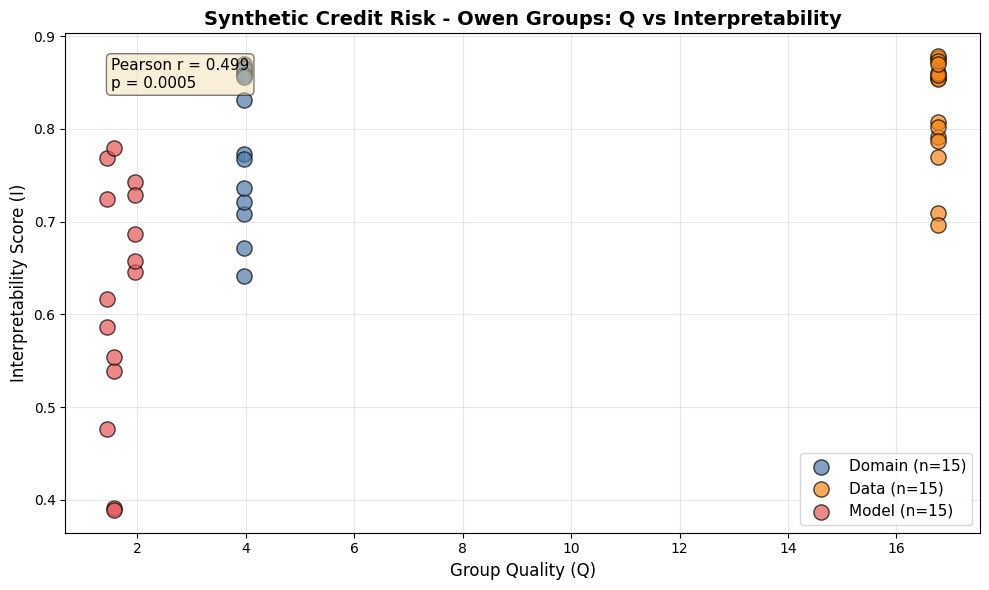

✓ Q vs Interpretability plot saved.

Statistical Analysis - Q vs Interpretability:
Domain Grouping: r = nan, p = nan
Data Grouping: r = nan, p = nan
Model Grouping: r = 0.3163, p = 0.2508

Overall: r = 0.4994, p = 0.0005
✓ Significant correlation between Q and I (p < 0.05)


In [4]:
# ============================================================
# RECOMPUTE Q FOR SYNTHETIC OWEN ROWS
# ============================================================

if 'metrics' in locals() and not metrics.empty and 'Method' in metrics.columns:
    owen_rows_synthetic = metrics[metrics['Method'] == 'Owen'].copy()

    if not owen_rows_synthetic.empty:
        print("\nComputing Q values for Owen groups (synthetic dataset)...")

        Q_values_synthetic = []

        for idx, row in owen_rows_synthetic.iterrows():
            grouping = row['Grouping']
            model = row['Model']
            sampler = row['Sampler']

            # Build pipeline
            pipe = ImbPipeline([
                ('prep', preprocessor),
                ('clf', models[model])
            ])

            # Cost-sensitive
            if sampler == 'CostSensitive':
                if model == 'RF':
                    pipe.named_steps['clf'].set_params(class_weight=class_weight_dict)
                elif model == 'XGB':
                    ratio = class_weight_dict[1] / class_weight_dict[0]
                    pipe.named_steps['clf'].set_params(scale_pos_weight=ratio)
                elif model == 'LGB':
                    pipe.named_steps['clf'].set_params(class_weight=class_weight_dict)

            # Fit on full dataset
            pipe.fit(X, y)

            # Preprocessed data
            X_proc = pipe.named_steps['prep'].transform(X)
            fnames = get_feature_names_out(preprocessor)

            # Correct grouping
            if grouping == 'Domain':
                groups = build_domain_groups_synthetic(fnames)
            elif grouping == 'Data':
                groups, _ = build_data_groups(X_proc)
            elif grouping == 'Model':
                shap_bg = get_shap_reliable(pipe, X.sample(200, random_state=42))
                groups, _ = build_model_groups(shap_bg)
            else:
                groups = {}

            # Compute dependency matrix
            X_proc_clean = np.nan_to_num(X_proc, nan=0.0)
            with np.errstate(invalid='ignore'):
                dep_raw = np.corrcoef(X_proc_clean.T)
            dep_raw = np.nan_to_num(dep_raw, nan=0.0, posinf=0.0, neginf=0.0)
            np.fill_diagonal(dep_raw, 1.0)
            dep_matrix = np.abs(dep_raw)

            # Compute Q
            Q = compute_Q(groups, dep_matrix)
            Q_values_synthetic.append(Q)

        # Insert Q back into metrics
        metrics.loc[metrics['Method'] == 'Owen', 'Q'] = Q_values_synthetic

        print("✓ Q values computed for synthetic dataset Owen groups.")

        # Display Q statistics
        owen_with_q = metrics[metrics['Method'] == 'Owen'].copy()
        if 'Q' in owen_with_q.columns:
            print("\nQ Statistics for Synthetic Dataset:")
            print(f"Mean Q: {owen_with_q['Q'].mean():.4f}")
            print(f"Std Q: {owen_with_q['Q'].std():.4f}")
            print(f"Min Q: {owen_with_q['Q'].min():.4f}")
            print(f"Max Q: {owen_with_q['Q'].max():.4f}")

            # Q by grouping type
            print("\nQ by Grouping Type:")
            q_by_grouping = owen_with_q.groupby('Grouping')['Q'].agg(['mean', 'std', 'count']).round(4)
            print(q_by_grouping)

            # Save updated metrics
            metrics.to_csv('synthetic_credit_complete_results_with_Q.csv', index=False)
            print("\n✓ Results with Q saved to: synthetic_credit_complete_results_with_Q.csv")
    else:
        print("No Owen rows found in synthetic dataset metrics.")
else:
    print("Metrics DataFrame not found or empty.")

# ============================================================
# VISUALIZE Q VS INTERPRETABILITY (I)
# ============================================================

if 'metrics' in locals() and not metrics.empty and 'Method' in metrics.columns and 'Q' in metrics.columns:
    owen_with_q = metrics[metrics['Method'] == 'Owen'].copy()

    if not owen_with_q.empty and 'Q' in owen_with_q.columns and 'I' in owen_with_q.columns:
        print("\n" + "="*80)
        print("Q vs INTERPRETABILITY VISUALIZATION")
        print("="*80)

        # Color palette for groups
        group_colors = {
            'Domain': '#4C78A8',
            'Data': '#F58518',
            'Model': '#E45756'
        }

        # Create visualization
        plt.figure(figsize=(10, 6))

        for g in ['Domain', 'Data', 'Model']:
            subset = owen_with_q[owen_with_q['Grouping'] == g]
            if not subset.empty:
                plt.scatter(subset['Q'], subset['I'], s=120, alpha=0.7,
                          label=f'{g} (n={len(subset)})', color=group_colors[g],
                          edgecolors='black')

        plt.xlabel("Group Quality (Q)", fontsize=12)
        plt.ylabel("Interpretability Score (I)", fontsize=12)
        plt.title("Synthetic Credit Risk - Owen Groups: Q vs Interpretability", fontsize=14, fontweight='bold')
        plt.legend(fontsize=11)
        plt.grid(alpha=0.3)

        # Add correlation coefficient
        if len(owen_with_q) >= 3:
            corr_coeff, p_value = stats.pearsonr(owen_with_q['Q'].dropna(),
                                                owen_with_q['I'].dropna())
            plt.text(0.05, 0.95, f"Pearson r = {corr_coeff:.3f}\np = {p_value:.4f}",
                    transform=plt.gca().transAxes, fontsize=11,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        plt.tight_layout()
        plt.savefig('synthetic_q_vs_interpretability.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✓ Q vs Interpretability plot saved.")

        # Statistical analysis of Q vs I
        print("\nStatistical Analysis - Q vs Interpretability:")
        for g in ['Domain', 'Data', 'Model']:
            subset = owen_with_q[owen_with_q['Grouping'] == g]
            if len(subset) >= 3:
                corr, p = stats.pearsonr(subset['Q'].dropna(), subset['I'].dropna())
                print(f"{g} Grouping: r = {corr:.4f}, p = {p:.4f}")

        # Overall correlation
        if len(owen_with_q) >= 3:
            corr, p = stats.pearsonr(owen_with_q['Q'].dropna(), owen_with_q['I'].dropna())
            print(f"\nOverall: r = {corr:.4f}, p = {p:.4f}")
            if p < 0.05:
                print("✓ Significant correlation between Q and I (p < 0.05)")
            else:
                print("✗ No significant correlation between Q and I")

